In [1]:
import pandas as pd
import numpy as np
import os

import collections
import itertools
import ast
import re

import matplotlib.pyplot as plt

from wordcloud import WordCloud
from krwordrank.word import KRWordRank

In [2]:
from konlpy.tag import Mecab

mecab = Mecab()

# with open('user_dict.txt', 'w') as dict: 
#     dict.write('해커스\tNNP\n일러스트\tNNP\n리커버\tNNP\n양장판\tNNP\n해리 포터\tNNP}')
    
# dicpath = 'user_dict.txt'

In [3]:
df = pd.read_csv('Book_title_1999to2020_in_aladin.csv')
df['writer'] = df['writer'].map(ast.literal_eval)
df.shape

(23200, 7)

In [4]:
df.head(2)

,year,month,title,url,writer,yr-mn,rank
0,2000,1,해리 포터와 마법사의 돌 1 (무선),https://www.aladin.co.kr/shop/wproduct.aspx?It...,"[(J.K. 롤링 (지은이), 김혜원 , (옮긴이), |)]",1-50,1
1,2000,1,해리 포터와 비밀의 방 1 (무선),https://www.aladin.co.kr/shop/wproduct.aspx?It...,"[(J.K. 롤링 (지은이), 김혜원 , (옮긴이), |)]",1-50,2


In [5]:
df[(df['writer'].map(len) != 1)]['writer'].size

258

In [6]:
df['writer'] = df[~(df['writer'].map(len) != 1)]['writer'].map(lambda x: ' '.join(x[0]))
df['writer'].head()

0               J.K. 롤링 (지은이), 김혜원  (옮긴이) |
1               J.K. 롤링 (지은이), 김혜원  (옮긴이) |
2                           도올 김용옥  (지은이) |
3    조애너 콜 (지은이), 브루스 디건 (그림), 이연수  (옮긴이) |
4    조애너 콜 (지은이), 브루스 디건 (그림), 이연수  (옮긴이) |
Name: writer, dtype: object

In [7]:
find_writer = re.compile(r"(.*?)\((.*?)\)")
df['split_writer'] = df[df['writer'].notna()]['writer'].map(find_writer.findall)
df['split_writer'].head()

0                   [(J.K. 롤링 , 지은이), (, 김혜원  , 옮긴이)]
1                   [(J.K. 롤링 , 지은이), (, 김혜원  , 옮긴이)]
2                                   [(도올 김용옥  , 지은이)]
3    [(조애너 콜 , 지은이), (, 브루스 디건 , 그림), (, 이연수  , 옮긴이)]
4    [(조애너 콜 , 지은이), (, 브루스 디건 , 그림), (, 이연수  , 옮긴이)]
Name: split_writer, dtype: object

In [8]:
df['title'] = df['title'].map(lambda x: x.replace('해리 포터', '해리포터'))

In [9]:
df['title-nouns'] = df['title'].apply(mecab.nouns)

In [10]:
df['title-nouns'].head()

0    [해리포터, 마법사, 돌, 무선]
1     [해리포터, 비밀, 방, 무선]
2              [노자, 세기]
3                [스쿨버스]
4                [스쿨버스]
Name: title-nouns, dtype: object

In [11]:
text_list = list(itertools.chain(*df['title-nouns'].tolist()))

In [12]:
len(text_list)

65666

In [13]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800
)
wordcloud = wordcloud.generate_from_frequencies(collections.Counter(text_list))

In [14]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

<class 'numpy.ndarray'>
(800, 800, 3)


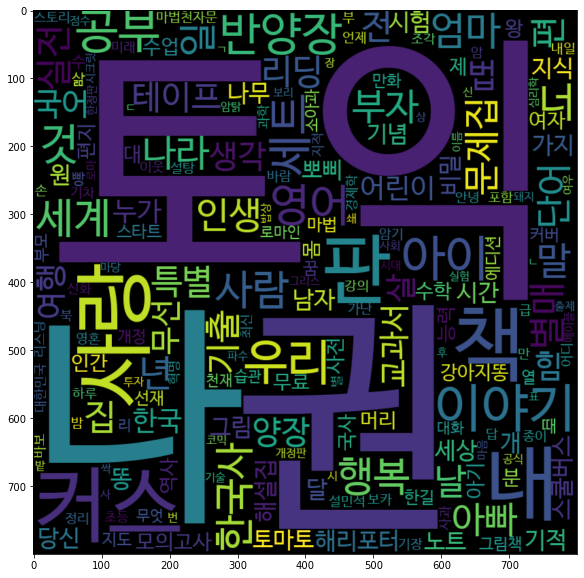

In [15]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")

In [24]:
import collections
count_words = collections.Counter(text_list)

In [32]:
count_df = pd.DataFrame.from_dict([count_words]).T.reset_index()
count_df.columns = ['title', 'counter']

In [34]:
count_df.head()

,title,counter
0,해리포터,149
1,마법사,34
2,돌,33
3,무선,163
4,비밀,134


In [16]:
filename = 'Book_title_1999to2020_in_aladin-processed.csv'

In [17]:
df.to_csv(filename, index = False)

In [35]:
count_df.to_csv('count_title_nouns.csv', index = False)